# Stochastic Gradient Descent (SGD) & Mini-Batch SGD — Brief Overview

## What is Stochastic Gradient Descent (SGD)?

**SGD** updates parameters using the gradient from **one random sample at a time** (not the whole dataset).

### Comparison: Batch GD vs SGD

| Aspect | Batch GD | SGD |
|--------|----------|-----|
| **Data per iteration** | Entire dataset (m samples) | One random sample |
| **Computation** | Slower per epoch | Faster per update |
| **Memory** | High (loads all data) | Low (one sample) |
| **Noise in updates** | Smooth, stable path | Noisy, zigzag path |
| **Local minima** | May get stuck | Better chance to escape |
| **For large datasets** | Impractical | Preferred |

### How SGD works (step-by-step)

```
For each iteration:
  1. Pick one random sample (xi, yi)
  2. Compute gradient: grad = 2 * X_i^T * (X_i * theta - yi)
     (Note: no division by m, just one sample)
  3. Update: theta := theta - eta * grad
  4. Repeat with next random sample
```

### Why SGD is noisy but better

- **Batch GD:** Takes the "correct" direction but slowly, may get trapped.
- **SGD:** Bounces around randomly but explores better, escapes local minima more easily.
- Trade-off: noisier updates but faster convergence on large datasets.

---

## What is Mini-Batch SGD?

**Mini-batch SGD** is a compromise: update using a **small batch of samples** (e.g., 32 or 64) instead of 1 or all m.

### Mini-Batch SGD Update

```
For each iteration:
  1. Pick a random batch of k samples (where k < m)
  2. Compute gradient over batch: grad = (2/k) * X_batch^T * error_batch
  3. Update: theta := theta - eta * grad
  4. Repeat with next batch
```

### Comparison: Batch vs SGD vs Mini-Batch

| Aspect | Batch GD | SGD | Mini-Batch |
|--------|----------|-----|-----------|
| **Batch size** | m (all) | 1 | k (e.g., 32) |
| **Speed** | Slow | Fast | Medium |
| **Stability** | Smooth | Noisy | Moderate |
| **Memory** | High | Low | Medium |
| **Practical use** | Small data | Large data | **Most common** |

### In Practice

Mini-batch SGD is the **most widely used** because it:
- ✅ Balances speed and stability
- ✅ Uses modern hardware efficiently (GPUs/TPUs process batches well)
- ✅ Reduces noise while keeping fast updates
- ✅ Works well with large datasets

**Typical mini-batch sizes:** 32, 64, 128, 256 samples per batch.

---

## Quick Takeaway

- **Batch GD:** One big step per epoch (slow, stable)
- **SGD:** Many tiny noisy steps per epoch (fast, escape local minima)
- **Mini-Batch SGD:** Many small steps with moderate noise (best of both worlds)

In [ ]:
# Common imports
import numpy as np
import os
import matplotlib.pyplot as plt
# to make this notebook's output stable across runs
np.random.seed(42)

In [10]:
def error(X:np.ndarray, theta, y_actual):
    return (X.dot(theta) - y_actual)

In [24]:
def calc_gradient(X:np.ndarray, theta, y_actual):
    err = error(X, theta, y_actual)
    #We need to transpse X to get the correct shape for matrix multiplication. The shape of grad will be same as theta.
    grad =  2 * X.T.dot(err)
    return grad

In [43]:
def compute_weights(X, y_actual):
    n_epochs = 10000
    eta = 0.1
    decay = 0.01
    theta = np.random.randn(3,1) #Init theta values. These are initial
    for epoch in range(n_epochs):
        #Give random order from 0 to m-1 for each epoch
        random_index = np.random.permutation(len(X))
        #Shuffle X and y_actual in the same way using random_index
        x_shuffled = X[random_index]
        y_shuffled = y_actual[random_index]
        for i in range(len(X)):
            #Pick one instance at a time and update theta. This is stochastic gradient descent
            x_i = x_shuffled[i:i+1]
            y_i = y_shuffled[i:i+1]
            #compute gradient and update theta
            eta = eta / (1 + decay * epoch) # learning rate decay
            grad = calc_gradient(x_i, theta, y_i)
            theta -= eta * grad
    return theta

In [ ]:
#Plot X, y to visualize the data
def plot_data(X, y):
    plt.scatter(X[:,1], y, color='blue', label='Data Points')
    plt.xlabel('Feature 1')
    plt.ylabel('Target')
    plt.title('Data Visualization')
    plt.legend()
    plt.show()

def plot_line(X, y,theta):
    import matplotlib.pyplot as plt
    plt.scatter(X[:,1], y, color='blue', label='Data Points')
    x_values = np.array([X[:,1].min(), X[:,1].max()])
    y_values = theta[0] + theta[1] * x_values
    plt.plot(x_values, y_values, color='red', label='Regression Line')
    plt.xlabel('Feature 1')
    plt.ylabel('Target')
    plt.title('Data Visualization with Regression Line')
    plt.legend()
    plt.show()

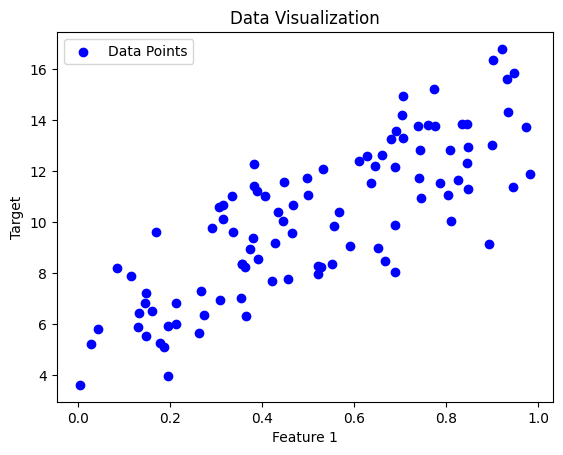

Theta computed using stochastic gradient descent: [[3.6229944 ]
 [8.29219681]
 [4.35911577]]


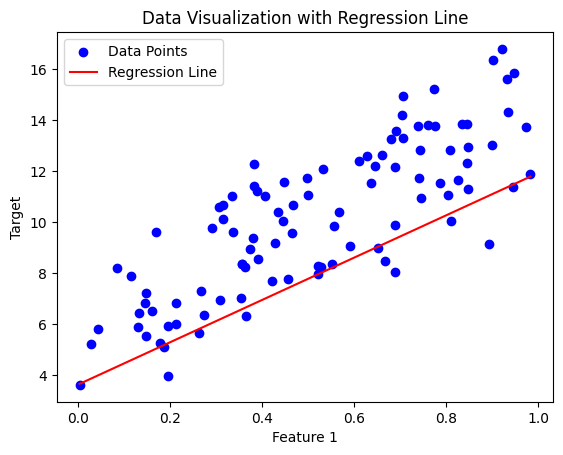

In [ ]:
features= np.random.rand(100,2)
features_with_bias = np.c_[np.ones((100,1)),features] #add x0=1 for each instance
weights_actual = np.array([3, 9, 5]).reshape(-1, 1)  # bias 3, theta_1=9, theta_2=5
y_actual = features_with_bias.dot(weights_actual) + np.random.randn(100,1)#added noise to make it more realistic to real-world data
plot_data(features_with_bias, y_actual)

theta_computed = compute_weights(features_with_bias, y_actual)
print("Theta computed using stochastic gradient descent:", theta_computed)
plot_line(features_with_bias, y_actual, theta_computed)